(datoslhco)=
# Datos de los algoritmos de las LHCO 2020
Cada algoritmos de las olimpiadas utilizó un pre-procesamiento de datos de acuerdo al método que utilizaron. En esta sección exploraremos los datos pre-procesados por UCluster y GAN-AE, para comprender mejor su acercamiento al problema.

(datoslhco-ucluster)=
## UCluster
Los datos pre-procesados por UCluster definen un punto en la implementación de ABNet. Las variables se describen a continuación:

```{table} Definición de las variables utilizadas por UCluster para entrenamiento y clasificación.
:name: datoslhco-ucluster-variables
|Variable                    |Descripción                                                                   |
|:--------------------------:|:----------------------------------------------------------------------------:|
|$\Delta\eta                 | Diferencia entre la pseudo-rapidez del constituyente y del jet               |
|$\Delta\phi                 | Diferencia entre el ángulo azimutal del constituyente y del jet              |
|$\log{p_T}$                 | Logaritmo del $p_T$ del constituyente                                        |
|$\log{E}$                   | Logaritmo de la $E$ del constituyente                                        |
|$\log\frac{p_T}{p_T_{jet}}$ | Logaritmo de la relación entre el $p_T$ del constituyente y el $p_T$ del jet |
|$\log\frac{E}{E_{jet}}$     | Logaritmo de la relación entre la $E$ del constituyente y la $E$ del jet     |
|$\Delta R$                  | Distancia entre el constituyente y el jet en el espacio $\eta-\phi$          |
|PID                         | Identificador del tipo de partícula                                          |
```
La distribución de estas variables se puede observar en {numref}``.

In [11]:
# Importamos librerias básicas
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import nexusformat.nexus as nx

from benchtools.src.plotools import bkg_sig_hist

In [7]:
with h5py.File('../../../datos/train_20v_RD_100P_2NJET.h5', 'r') as hdf:
    hdfdata = hdf.get('data')
    data = np.array(hdfdata)
data.shape

(367153, 100, 7)

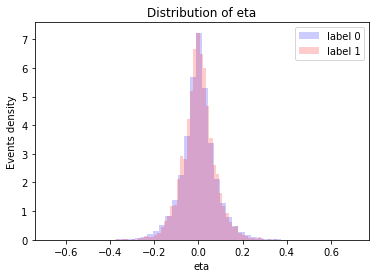

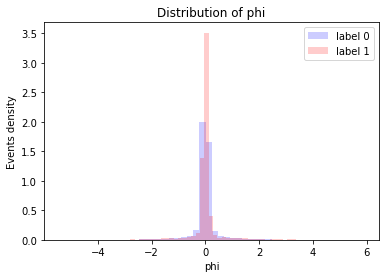

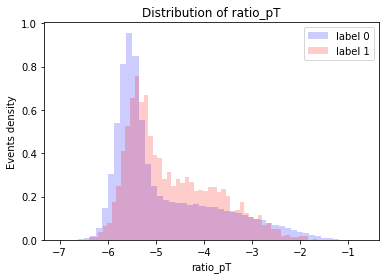

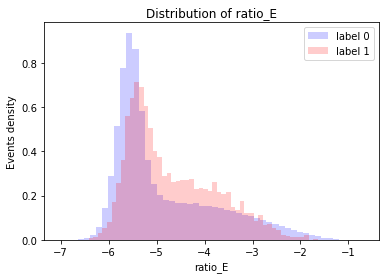

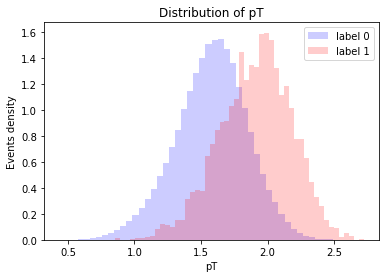

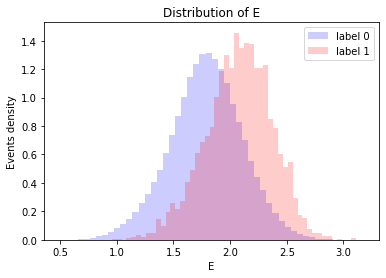

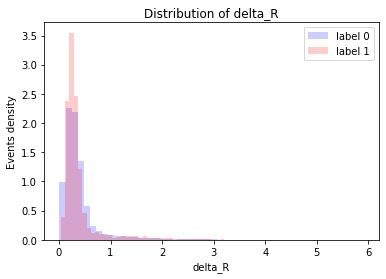

In [12]:
columns = ['eta', 'phi', 'ratio_pT', 'ratio_E', 'pT', 'E', 'delta_R']
df = pd.DataFrame(data.mean(axis=(1)), columns = columns)
pid = pd.Series(np.array(h5py.File('../../../datos/train_20v_RD_100P_2NJET.h5', 'r')['pid']))
df = df.assign(label=pid.values)

variables = df.drop('label', axis=1).columns
for variable in variables:
    bkg_sig_hist(df, variable=variable, label='label')
    plt.show()

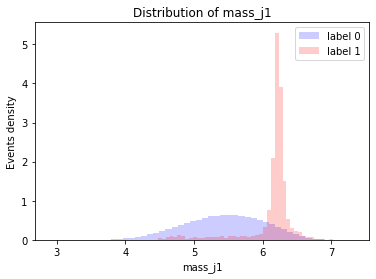

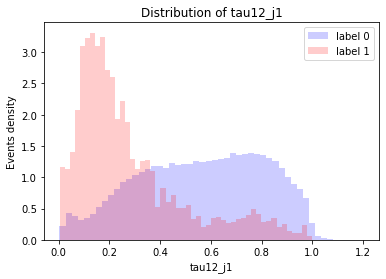

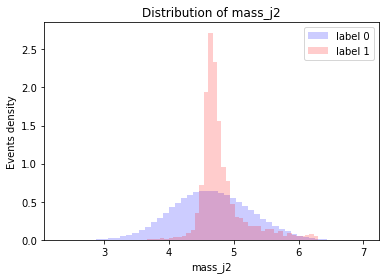

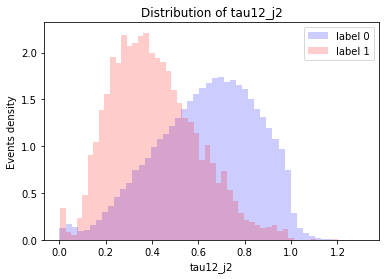

In [13]:
columns=['mass_j1', 'tau12_j1', 'mass_j2', 'tau12_j2']
df_global = pd.DataFrame(np.array(h5py.File('../../../datos/train_20v_RD_100P_2NJET.h5', 'r')['global']), columns=columns)
df_global=df_global.assign(label=pid.values)

for variable in columns:
    bkg_sig_hist(df_global, variable=variable, label='label')
    plt.show()

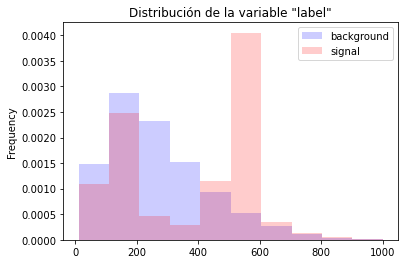

In [17]:
# Loading the label dataframe
df_label = pd.DataFrame(np.array(h5py.File('../../../datos/train_20v_RD_100P_2NJET.h5', 'r')['label']))
# Adding the labels
df_label = df_label.assign(label=pid.values)
# Separating signal and background
df_label_bkg = df_label.loc[df_label['label']==0]
df_label_sig = df_label.loc[df_label['label']==1]

MASSRANGE = np.linspace(10,1000,20)
MASSRANGE = np.append(MASSRANGE, [100000])
map_list = []
for x in enumerate(MASSRANGE):
    if x[0]==20: break
    map_list.append(x)
df_map = pd.DataFrame(map_list, columns=['value', 'mass'])
df_map.head()

df_map = df_map.set_index("value")["mass"]
df_label_map = pd.DataFrame()
# Mapping the values 
for col in df_label.drop('label', axis=1):
    df_label_map[col] = df_label[col].map(df_map).fillna(df_label[col])
# Adding the labels
df_label_map = df_label_map.assign(label=pid.values)
df_label_map.head()

# Separating signal and background
df_label_bkg = df_label_map.loc[df_label_map['label']==0]
df_label_sig = df_label_map.loc[df_label_map['label']==1]
# Plotting 
# 'stack' to plot all the values of each dataframe on the histogram
df_label_bkg.drop('label', axis=1).stack().plot.hist(facecolor='b', alpha=0.2, label='background', density=True)
df_label_sig.drop('label', axis=1).stack().plot.hist(facecolor='r', alpha=0.2, label='signal', density=True)
plt.legend(loc='upper right')
plt.title('Distribución de la variable "label"');

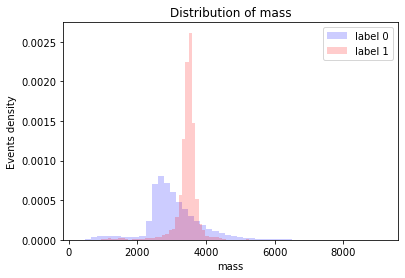

In [18]:
df_masses = pd.DataFrame(np.array(h5py.File('../../../datos/train_20v_RD_100P_2NJET.h5', 'r')['masses']), columns=['mass'])
df_masses=df_masses.assign(label=pid.values)
bkg_sig_hist(df_masses, variable='mass', label='label')
plt.show()

(datoslhco-ganae)=
## GAN-AE

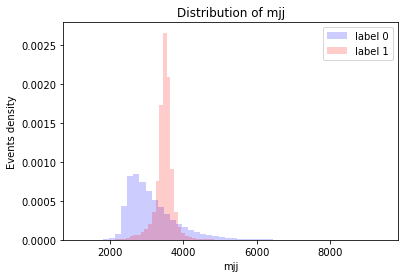

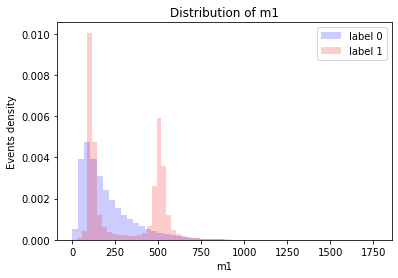

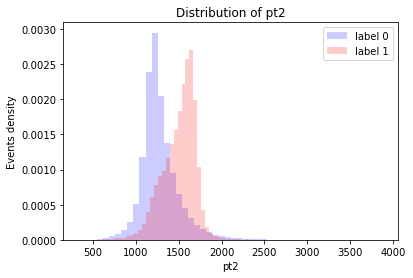

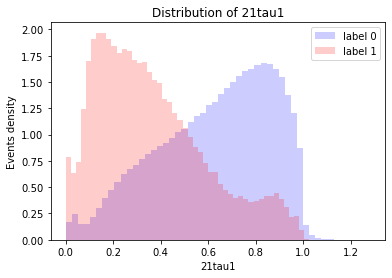

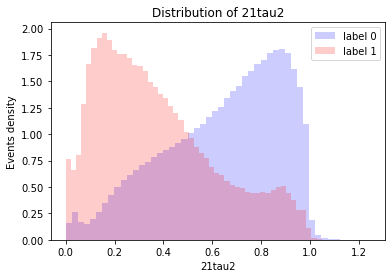

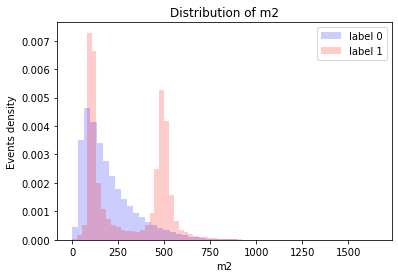

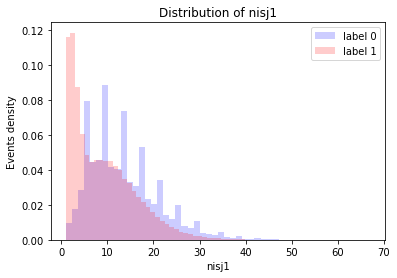

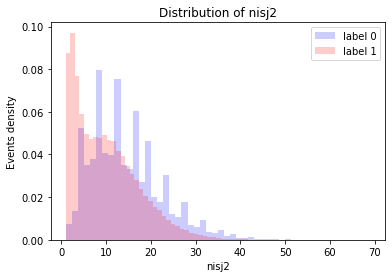

In [ ]:
df_bkg = pd.read_hdf('../../../datos/bkgHLF_merged_RnD.h5')
df_sig=pd.read_hdf('../../../datos/sigHLF_merged_RnD.h5')

# I'll add a label variable to plot
df_bkg['label']=0
df_sig['label']=1

df = pd.concat([df_bkg, df_sig])


# I'll list some variables according to 
# the feature importance on the presentation
some_variables = ['mjj', 'm1', 'pt2', '21tau1', '21tau2', 'm2', 
                  'nisj1', 'nisj2', 'pt1', '1tau2']
for variable in some_variables:
    bkg_sig_hist(df, variable, label='label')
    plt.show();